<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/waves/diffuserImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coherent imaging through a diffuser
## David Brady
## University of Arizona
## September 2023

# System analysis





We consider the transformation between an input distribution $f(x)$ and an output distribution $g(x)$ under the Fresnel transformation. The Fresnel transormation is defined as
$${\tilde f}_\tau (x)=\frac{1}{\tau}\int_{-\infty}^{\infty} f(x')e^{i\pi \frac{(x-x')^2}{\tau^2}} dx'$$
The Gaussian distribution $\phi_o(x)=e^{-\pi x^2}$ is an eigenfunction of the Fresnel transformation, specifically
$${\tilde \phi}_\tau (x)= \frac{e^{i\frac{\pi}{4}}}{\sqrt{1 +i\tau^2}}e^{-\pi \frac{x^2}{1+i\tau^2}}$$

The Fresnel transformation is often used to model wave diffraction. For the input wavefront $f(x)$ the output wave on a boundary a distance $z$ from the input boundary is $g(x)={\tilde f}_{\tau = \sqrt{\lambda z}}(x)$, e.g.
$$g(x)=\frac{1}{\sqrt{\lambda z}} \int_{-\infty}^{\infty} f(x')e^{i\pi \frac{(x-x')^2}{\lambda z}} dx' $$

Of course, one expects that diffracting from plane 0 to plane $z_1$ and then diffracting from plane $z_1$ to plane $z_2$ should produce the same field as diffracting from plane $z=0$ to plane $z_3=z_1+z_2$. For this to occur, one necessarily expects that
$${\tilde {\cal F}}_\tau \left \lbrace f(x) \right \rbrace = {\tilde {\cal F}}_{\sqrt{\tau^2-t^2}} \left \lbrace {\tilde {\cal F}}_t \left \lbrace f(x) \right \rbrace \right \rbrace$$
for $t<\tau$, where ${\tilde {\cal F}}_\tau \left \lbrace \cdot \right \rbrace $ is the Fresnel transform with parameter $\tau$.

#### libraries

In [14]:

import os
import cv2
import numpy as np
import skimage
import scipy
import matplotlib.pyplot as plt
from google.colab import files






### Definition of the Fresnel transform and the Guassian beam

In [5]:

def fT(f,dx,tau):
#
# calculate the fresnel transform for 1D signal f with sampling pitch dx.
#
  #u=np.linspace(-1./(2*dx),1./(2*dx),len(f))
  u=np.arange(0,len(f))-len(f)/2
  u=u/np.max(u)
  u=u/(2*dx)
  fT=np.fft.ifft(np.fft.fft(f)*np.fft.fftshift(np.exp(-1j*np.pi*(tau**2)*(u**2) )))
  return fT
def gB(x,tau):
  ## gaussian beam propagated distance tau
  gb=(1/np.sqrt(1+1j*tau**2))*np.exp(-np.pi*(x**2)/(1+1j*tau**2))
  return gb









## Comparison of the Fresnel diffracted beam and the gaussian mode.

here we compare the Gaussian beam propagated a distance propagation distance z with the gaussian beam propagated a distannce $z_1<z$  and then Fresnel diffacted a distance $z_2=z-z_1$. This is a check of our codes. We assume here that $\lambda =1$, $z$ and $x$ may be assumed to be in units of $\lambda $. The signals are vertically displaced to allow comparison.

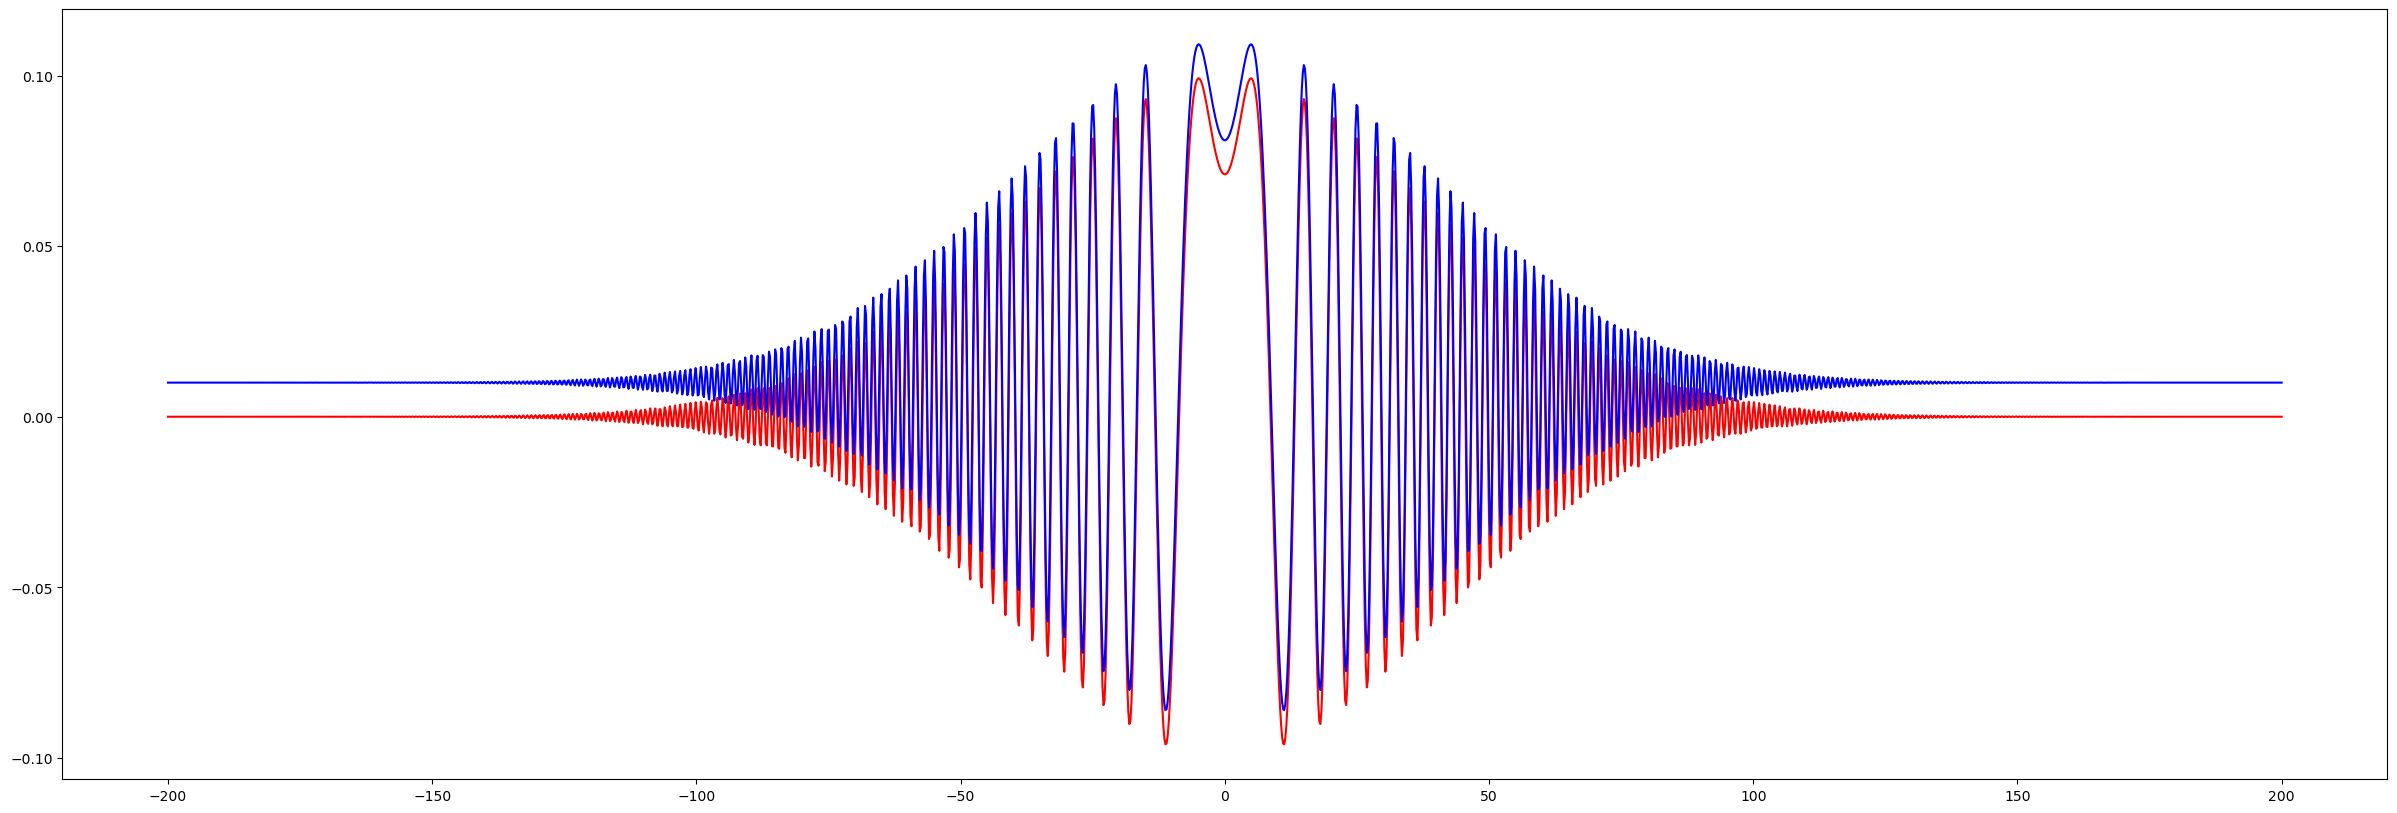

In [ ]:
z=100
z1=60
plt.figure(figsize=(30,10))
x = np.linspace(-200, 200, 2048)
plt.plot(x,np.real(gB(x,np.sqrt(z))),'r',x,np.real(fT(gB(x,np.sqrt(z1)),x[2]-x[1],np.sqrt(z-z1)))+.01,'b')
#plt.plot(x,np.real(fT(fT(gB(x,0),x[2]-x[1],8),x[2]-x[1],6)),'r',x,np.real(fT(gB(x,0),x[2]-x[1],10)),'b')

## Use of SVD to calculate the modes between the input and output planes

The input distribution at $z=o$ is parameterized as by Gaussian beams at positions $x$. We use singular value analysis to find the singular vectors describing the input and output distributions, where both the input and the output are on spaces of extending spanning $-X,X$. Here we let $X=100\lambda$

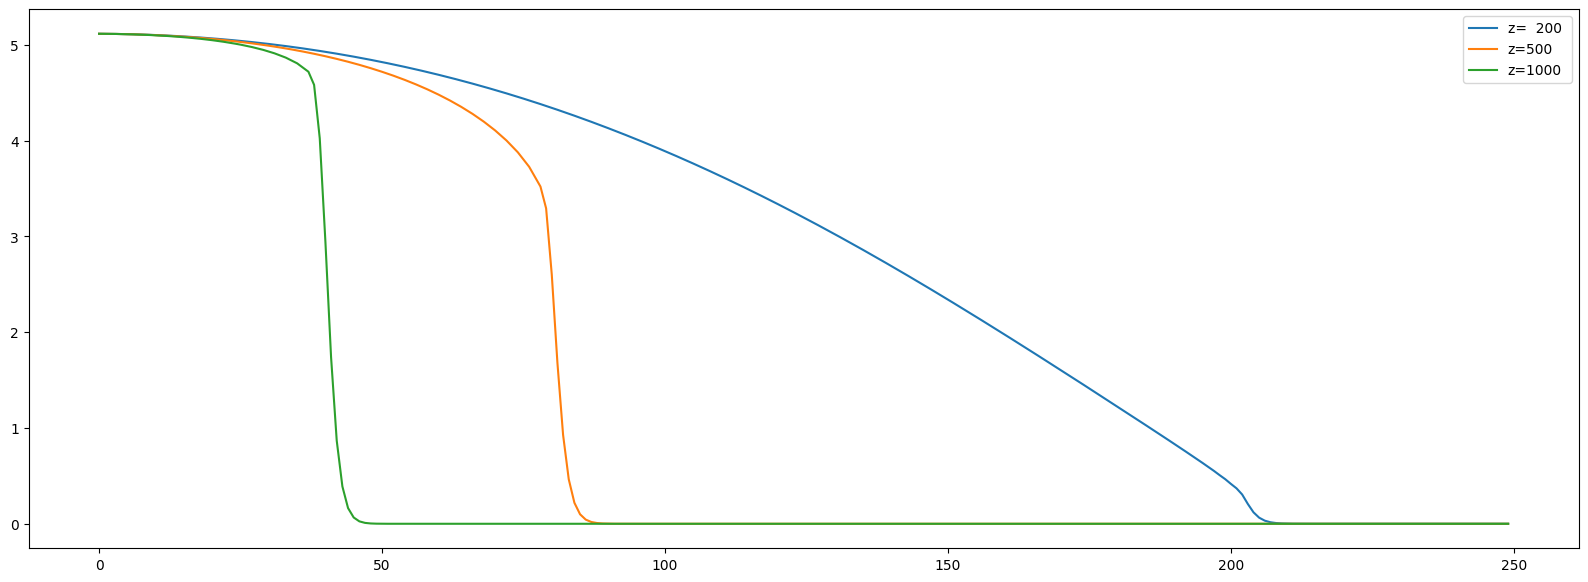

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(20,7))
x = np.linspace(-100, 100, 1024)
xin, xout = np.meshgrid(x, x)
for planeSeparation in [200, 500, 1000]:
  tau=np.sqrt(planeSeparation)
  H=gB(xin-xout,tau)
  u, lam, vp=np.linalg.svd(H)
  lb=['z=  200 ', 'z=500','z=1000']
  plt.plot(lam[:250])
  plt.legend(lb)
plt.show()
plt.savefig('diffractionModes.pdf')
files.download('diffractionModes.pdf')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

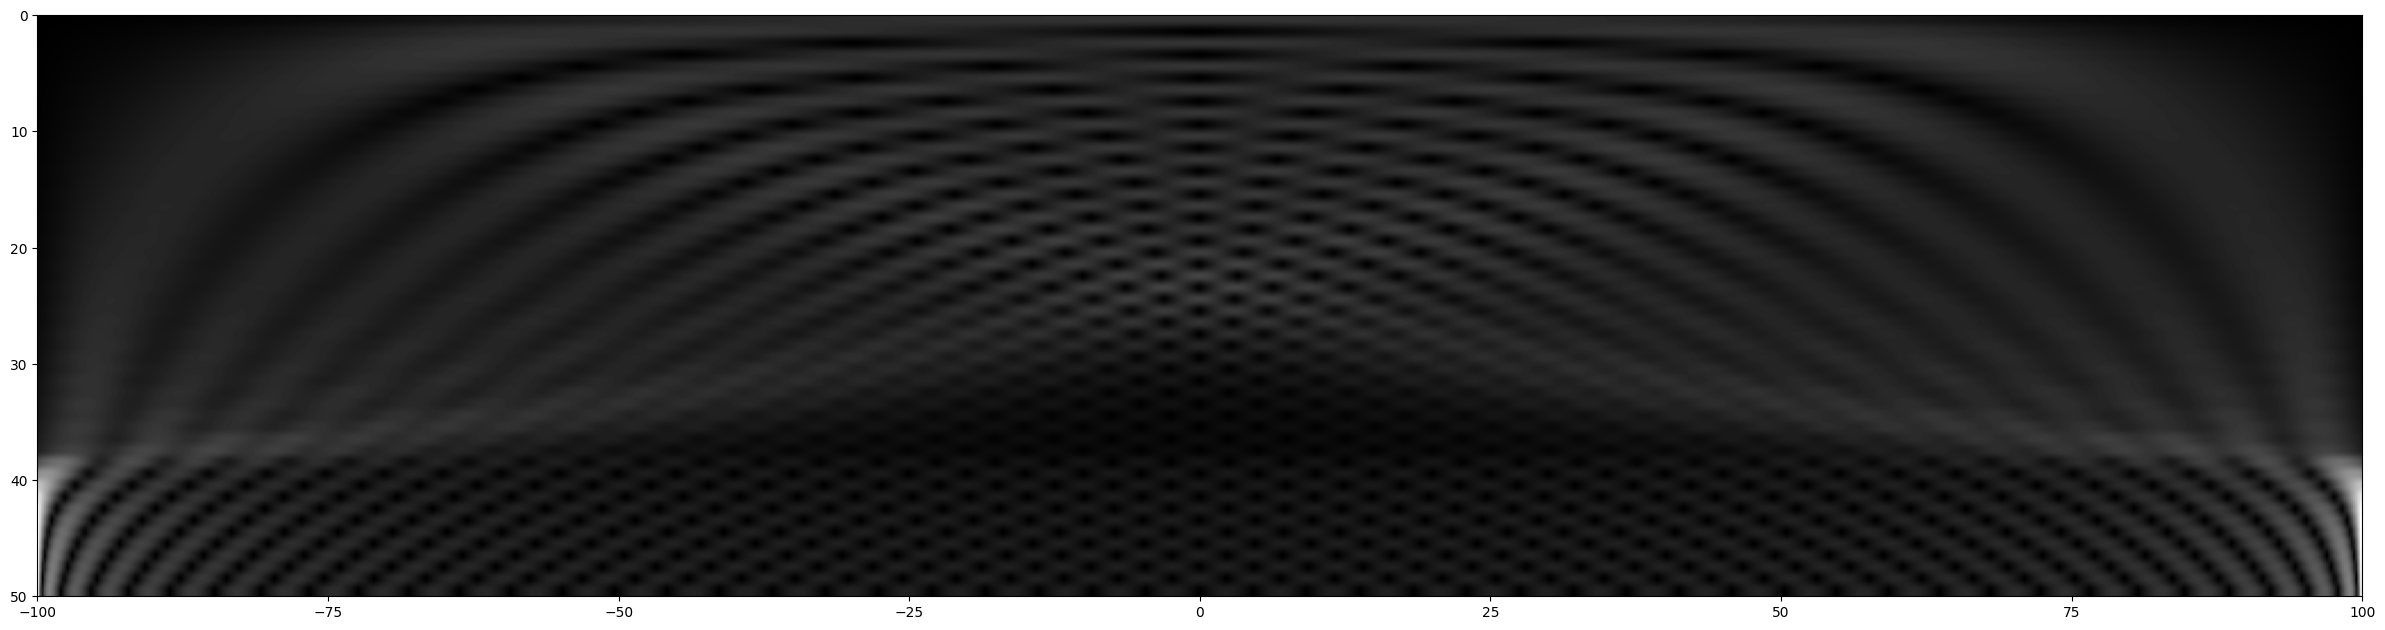

In [16]:
plt.figure(figsize=(30,30))
plt.imshow(np.abs(vp[:50,:]), extent=[-100,100,50,0], cmap='gray')
plt.savefig('diffractionModesObjectSpace.pdf')
files.download('diffractionModesObjectSpace.pdf')

with a diffuser

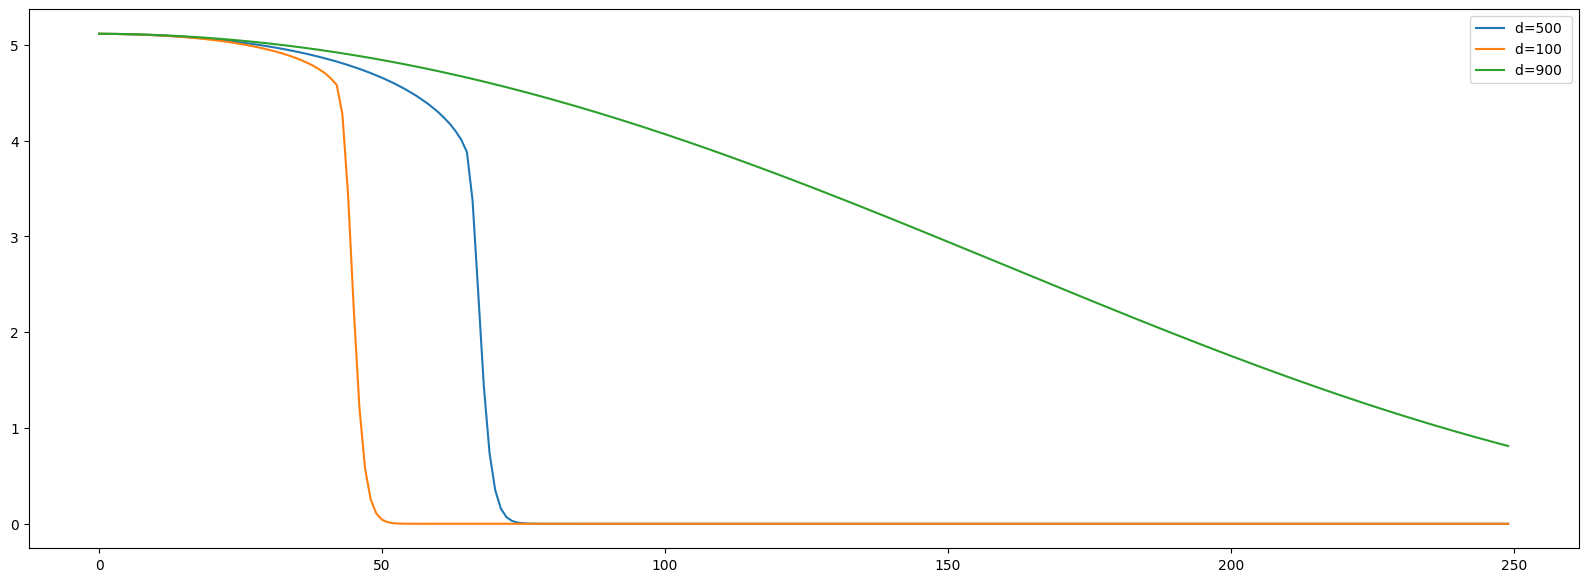

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [17]:
# for each input point
# field at the diffuser
plt.figure(figsize=(20,7))
phase=np.random.random(32)
phaseF=scipy.interpolate.interp1d(np.linspace(-100, 100, 32), phase, kind='cubic')
screenRange=planeSeparation-400
Hd=0.*H
for x1 in range(len(x)):
  Hd[x1,:]=fT(gB(x-x[x1],np.sqrt(screenRange))*np.exp(1j*2*np.pi*phaseF(x)),x[2]-x[1],np.sqrt(planeSeparation-screenRange))
u, lam, vp=np.linalg.svd(Hd)
plt.plot(lam[:250], label='d=500 ')
screenRange=planeSeparation-100
Hd=0.*H
for x1 in range(len(x)):
  Hd[x1,:]=fT(gB(x-x[x1],np.sqrt(screenRange))*np.exp(1j*2*np.pi*phaseF(x)),x[2]-x[1],np.sqrt(planeSeparation-screenRange))
u, lam, vp=np.linalg.svd(Hd)
plt.plot(lam[:250],label='d=100 ')
screenRange=planeSeparation-900
Hd=0.*H
for x1 in range(len(x)):
  Hd[x1,:]=fT(gB(x-x[x1],np.sqrt(screenRange))*np.exp(1j*2*np.pi*phaseF(x)),x[2]-x[1],np.sqrt(planeSeparation-screenRange))
u, lam, vp=np.linalg.svd(Hd)
plt.plot(lam[:250],label='d=900 ')
plt.legend()
plt.show()
plt.savefig('diffractionModesDiffuser.pdf')
files.download('diffractionModesDiffuser.pdf')

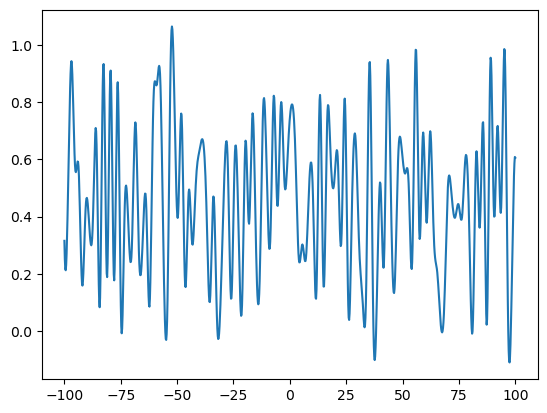

In [ ]:
plt.plot(x,phaseF(x))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

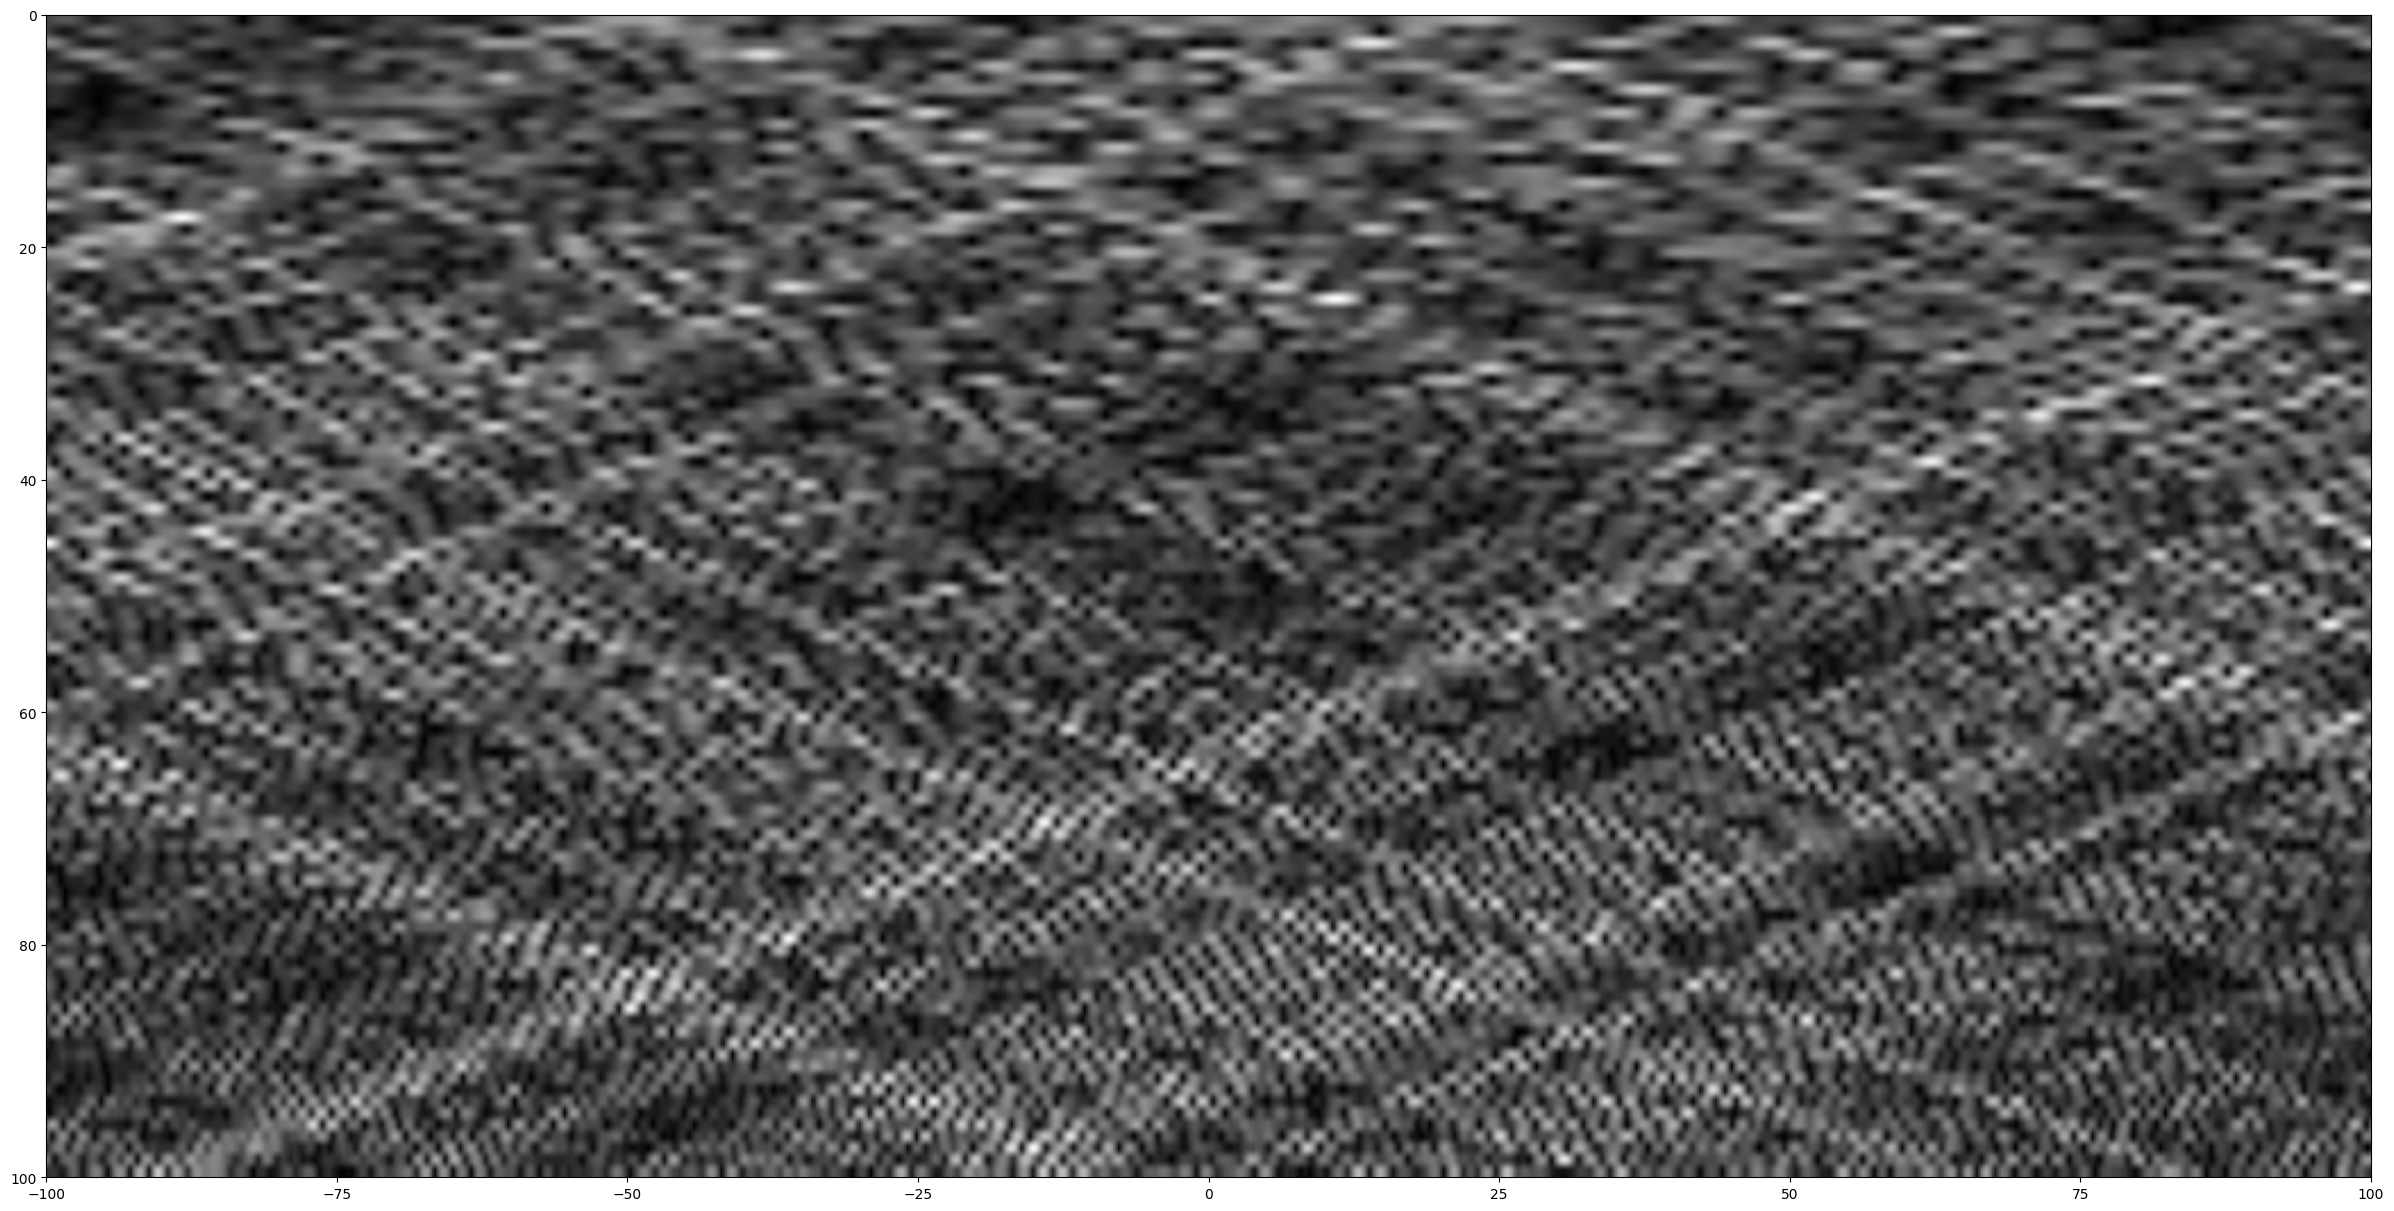

In [18]:
plt.figure(figsize=(30,30))
plt.imshow(np.abs(vp[:100,:]), extent=[-100,100,100,0], cmap='gray')
plt.savefig('diffractionModesDiffuserObjectSpace.pdf')
files.download('diffractionModesDiffuserObjectSpace.pdf')